### EXAMEN - Convocatoria 1 - Programación
Utilizar el conjunto de datos "dataset_exam.npy" para resolver el ejercicio. Tener en cuenta que la última columna corresponde a la clase.

#### 1) Partición de datos externa (1 punto)
Realizar una partición externa de tipo hold-out seleccionando un 20% de los datos para test (fijar una semilla en 42).
Comprobad si los datos, tanto de train como de test, están más o menos balanceados.

In [1]:
# cargar los datos

import numpy as np
path = "C:/Users/plane/OneDrive/Escritorio/COMPUTING SCIENCE/MASTER Inteligencia artificial/Examenes VIU/Examenes VIU/Aprendizaje Supervisado/2022/examen/dataset_exam.npy"
data = np.load(path, allow_pickle=True)
print(data.shape)

(492, 9)


In [2]:
# particion externa de datos
from sklearn.model_selection import train_test_split

X = data[:,:-1] # todas las columnas menos la ultima
y= data[:, -1]  # la ultima columna

print(X[:10])
print(y[:10])

[[ 0.          4.          1.          4.          2.          9.04481012
   8.2603626   7.37490176]
 [ 0.          4.          0.          6.          1.          8.56908202
  10.9370737  10.30131004]
 [ 0.          3.          1.          1.          5.          9.68777842
  10.69134847 11.45671439]
 [ 0.          2.          1.          5.          1.         12.05722101
  10.28635715 10.57502776]
 [ 0.          2.          2.          3.          2.          9.7329694
   9.44713959  9.38302878]
 [ 0.          2.          0.          3.          4.          9.24832625
   8.65582526  9.14697701]
 [ 0.          3.          3.          2.          2.         10.01072872
   9.45140933  7.1923626 ]
 [ 1.          1.          0.          4.          3.         10.22556869
  11.51178339 10.58565178]
 [ 0.          2.          2.          5.          0.          9.70639429
   9.71736333  9.42532394]
 [ 0.          0.          1.          4.          2.         10.48258946
  10.63780463 10.0

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, shuffle=True, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(393, 8)
(99, 8)
(393,)
(99,)


In [4]:
# comprobando que esten balanceados

unique_train, counts_train = np.unique(y_train, return_counts= True)
unique_test, counts_test = np.unique(y_test, return_counts= True)
print(f'las ocurrencias para el enternamiento son {unique_train}, y de cada hay {counts_train}')
print(f'las ocurrencias para el test son {unique_test}, y de cada hay {counts_test}')

las ocurrencias para el enternamiento son [0. 1.], y de cada hay [195 198]
las ocurrencias para el test son [0. 1.], y de cada hay [51 48]


#### 2) Estandarización de los datos de train y test (1 punto)
Utilizar el método StandardScaler().

In [5]:
from sklearn.preprocessing import StandardScaler

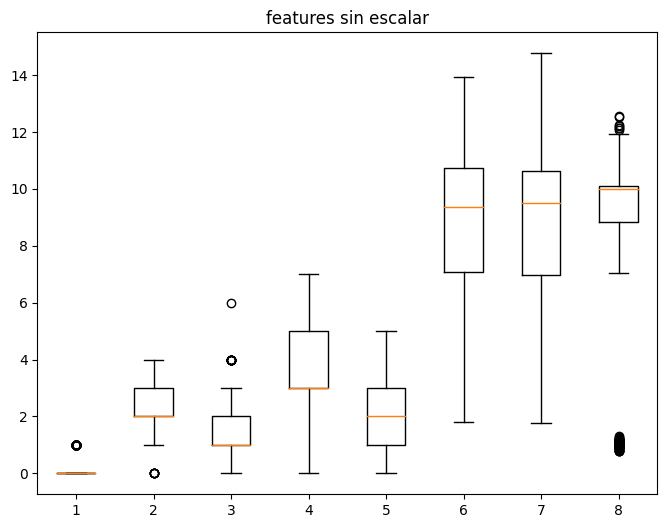

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize= (8, 6))
plt.boxplot(X_train)
plt.title('features sin escalar')
plt.show()

In [7]:
scaler = StandardScaler()
X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

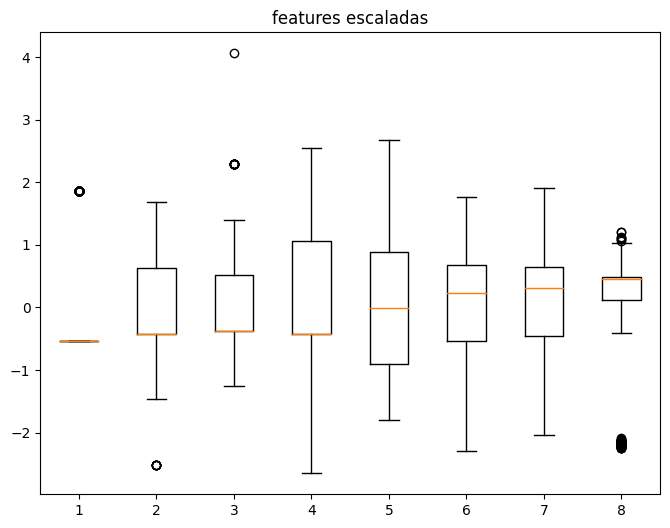

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize= (8, 6))
plt.boxplot(X_train_scl)
plt.title('features escaladas')
plt.show()

#### 3) Selección de atributos en train y test (1 punto)
Aplicar el método de mutual information para clasificación seleccionando un percentile=90. (Recordad la función "SelectPercentile")

In [9]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import mutual_info_classif

selector = SelectPercentile(mutual_info_classif, percentile = 90)
selector.fit(X_train_scl, y_train)

SelectPercentile(percentile=90,
                 score_func=<function mutual_info_classif at 0x0000029417EA71C0>)

In [10]:
X_train_final = selector.transform(X_train_scl)
X_test_final = selector.transform(X_test_scl)

In [11]:
# from sklearn.feature_selection import VarianceThreshold
# th = 0.2
# sel = VarianceThreshold(th)
# X_train_final = sel.fit_transform(X_train_final)
# X_test_final = sel.transform(X_test_final)

In [12]:
print(X_train_final.shape)
print(X_test_final.shape) # se ha eliminado una caracteristica

(393, 7)
(99, 7)


#### 4) Comparación de modelos de clasificación mediante validación cruzada (3 puntos)
Instrucciones:

- Aplicar una validación cruzada interna de K=5 bolsas para optimizar y comparar la capacidad predictiva de los siguientes modelos: Regresión Logística y Support Vector Machine.
- La optimización de hiperparámetros debe realizarse de manera automática. (Recordad la función "GridSearchCV").
- La comparación debe realizarse únicamente en términos de exactitud proporcionando resultados de media +- desviación estándar.

In [13]:
from sklearn.model_selection import cross_validate, cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [14]:
logr = LogisticRegression(fit_intercept= True)
logr_hparams = {'solver': ['lbfgs', 'liblinear','saga'],
                'C': [0.1, 1, 10, 100],
                }

GS_logr = GridSearchCV(estimator= logr,
                       param_grid=logr_hparams,
                       cv = KFold(n_splits=5, shuffle=True, random_state=42),
                       scoring= 'accuracy',
                       n_jobs= -1)

GS_logr.fit(X_train_final, y_train)

best_logr = GS_logr.best_estimator_
print(GS_logr.best_score_)

0.6842908146705615


In [15]:
best_logr

LogisticRegression(C=0.1, solver='liblinear')

In [16]:
svc = SVC()
svc_hparams = {'kernel': ['linear', 'poly', 'rbf'],
               'C': [0.1, 1, 10, 100],
               'gamma': ['auto', 'scale']}

GS_svc = GridSearchCV(estimator= svc,
                       param_grid=svc_hparams,
                       cv = KFold(n_splits=5, shuffle=True, random_state=42),
                       scoring= 'accuracy',
                       n_jobs= -1)

GS_svc.fit(X_train_final, y_train)

best_svc = GS_svc.best_estimator_
print(GS_svc.best_score_)

0.829438493995456


In [17]:
best_svc

SVC(C=100, gamma='auto')

In [18]:
print(GS_logr.best_params_)
print(GS_svc.best_params_)

{'C': 0.1, 'solver': 'liblinear'}
{'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}


In [19]:
from math import sqrt
algoritmos = {'LOGR': LogisticRegression(C= 0.1, solver=  'liblinear'),
              'SVC': SVC(C= 100, gamma=  'auto', kernel=  'rbf')}

for nombre, algoritmo in algoritmos.items():
    result = cross_val_score(algoritmo, X_train_final, y_train, scoring= 'accuracy', cv= KFold(n_splits=5, shuffle= True, random_state= 42))
    print(f'Para el algorimto \t {nombre} \t se obtiene una exactitud de \t {round(result.mean(), 4)} +- {round(sqrt(result.var()), 4)}')

Para el algorimto 	 LOGR 	 se obtiene una exactitud de 	 0.6843 +- 0.0388
Para el algorimto 	 SVC 	 se obtiene una exactitud de 	 0.8294 +- 0.0431


#### 5) Evaluación de los modelos sobre el conjunto de test (2.5 puntos)
- Entrenar los modelos anteriores utilizando todos los datos de entrenamiento.
- Evaluar su rendimiento sobre el conjunto de test mostrando una tabla de resultados tal que:
 * Las filas serán: Precisión, Sensibilidad, F-score, Exactitud y AUC
 * Las columnas serán: LOGR y SVM
 

In [20]:
from sklearn import metrics
metricas = {
  'ACC':    lambda y_true, y_pred: metrics.accuracy_score(y_true, y_pred),
  'PREC':   lambda y_true, y_pred:metrics.precision_score(y_true, y_pred),
  'RECALL': lambda y_true, y_pred:
            metrics.recall_score(y_true, y_pred),
  'F1':     lambda y_true, y_pred:
            metrics.f1_score(y_true, y_pred),
  "AUC":    lambda y_true, y_pred: metrics.roc_auc_score(y_true, y_pred)}

algoritmos = {'LOGR': GS_logr.best_estimator_,
              'SVC': GS_svc.best_estimator_}

evaluacion_de_algoritmos = {}
for nombre, algoritmo in algoritmos.items():
  resultados = []
  y_pred = algoritmo.predict(X_test_final)

  for nombre_, metrica in metricas.items():
   
    resultados.append(round(metrica(y_pred, y_test), 4))

  evaluacion_de_algoritmos[nombre] = resultados

print(evaluacion_de_algoritmos)


{'LOGR': [0.6263, 0.7083, 0.5965, 0.6476, 0.6316], 'SVC': [0.8687, 0.875, 0.8571, 0.866, 0.8686]}


In [21]:
import pandas as pd

algo_metricas = pd.DataFrame(data= evaluacion_de_algoritmos, index=list(metricas.keys()) )
display(algo_metricas)

,LOGR,SVC
ACC,0.6263,0.8687
PREC,0.7083,0.8750
RECALL,0.5965,0.8571
F1,0.6476,0.8660
AUC,0.6316,0.8686


#### 6) Visualización de resultados (1 punto)
- Mostrar la matriz de confusión
- Mostrar en una única figura la comparación de las curvas ROC obtenidas por cada modelo. (Recordad que SVM requiere un parámetro específico en su llamada para poder calcular la curva ROC).

In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
for nombre, algo in algoritmos.items():
    print(f'La matriz de confusion es la siguiente para el modelo {nombre}')
    y_pred = algo.predict(X_test_final)
    print(confusion_matrix(y_pred, y_test))
    print('\n')

La matriz de confusion es la siguiente para el modelo LOGR
[[28 14]
 [23 34]]


La matriz de confusion es la siguiente para el modelo SVC
[[44  6]
 [ 7 42]]




In [24]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [25]:
y_pred_logr = best_logr.predict(X_test_final)
y_pred_svc = best_svc.predict(X_test_final)

In [26]:
best_logr.predict_proba(X_test_final)[:,1]

array([0.49352029, 0.61447576, 0.39182347, 0.25038169, 0.63391705,
       0.40918372, 0.6592708 , 0.45547193, 0.55549384, 0.32899033,
       0.38801115, 0.2780836 , 0.51719622, 0.5467288 , 0.25174434,
       0.55456192, 0.71459467, 0.28058039, 0.55711815, 0.63040295,
       0.5261178 , 0.49848992, 0.63943818, 0.62120564, 0.51621046,
       0.48903072, 0.26205612, 0.56733775, 0.25233134, 0.66810349,
       0.50350524, 0.69928038, 0.7270213 , 0.39733105, 0.45675995,
       0.29289618, 0.55915984, 0.54607313, 0.50142712, 0.72804428,
       0.35284999, 0.58624308, 0.51262528, 0.50970366, 0.51158226,
       0.40781515, 0.5241423 , 0.33115398, 0.48510319, 0.54438153,
       0.52287897, 0.46649786, 0.56944298, 0.38833269, 0.42357529,
       0.5012989 , 0.54296913, 0.82406591, 0.38977982, 0.56259975,
       0.72591775, 0.44702742, 0.51226332, 0.54395493, 0.25588222,
       0.58852516, 0.32371022, 0.31721168, 0.67812619, 0.69280881,
       0.5511727 , 0.7147074 , 0.49788369, 0.31894215, 0.35592

In [27]:
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, best_logr.predict_proba(X_test_final)[:, 1])
fpr_svc, tpr_svc, thersholds_svc = roc_curve(y_test, best_svc.decision_function(X_test_final))

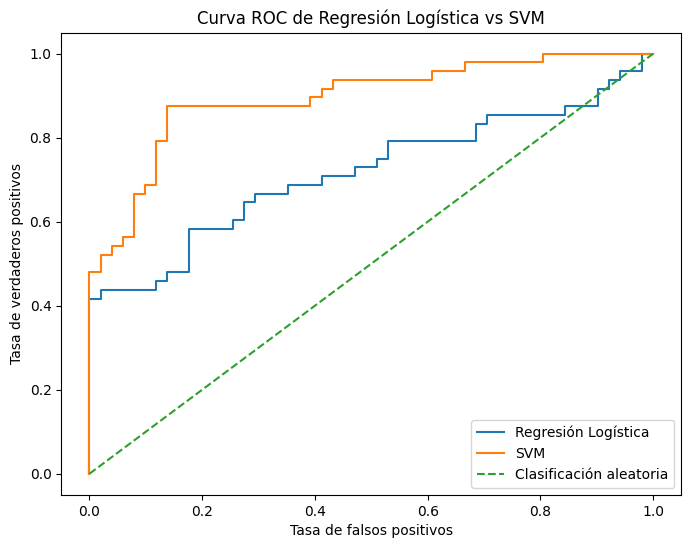

In [28]:
plt.figure(figsize= (8, 6))
plt.plot(fpr_log, tpr_log, label="Regresión Logística")
plt.plot(fpr_svc, tpr_svc, label="SVM")
plt.plot([0, 1], [0, 1], linestyle="--", label="Clasificación aleatoria")
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC de Regresión Logística vs SVM")
plt.legend()
plt.show()

In [29]:
! pip install tensorflow

                                              0.0/284.1 MB ? eta -:--:--
                                              0.2/284.1 MB 7.6 MB/s eta 0:00:38
                                             1.6/284.1 MB 20.6 MB/s eta 0:00:14
                                             3.3/284.1 MB 26.4 MB/s eta 0:00:11
                                             5.3/284.1 MB 30.5 MB/s eta 0:00:10
     -                                       7.6/284.1 MB 34.8 MB/s eta 0:00:08
     -                                      10.1/284.1 MB 38.1 MB/s eta 0:00:08
     -                                      12.7/284.1 MB 54.4 MB/s eta 0:00:05
     --                                     15.5/284.1 MB 54.7 MB/s eta 0:00:05
     --                                     18.3/284.1 MB 59.5 MB/s eta 0:00:05
     --                                     20.8/284.1 MB 59.5 MB/s eta 0:00:05
     ---                                    23.6/284.1 MB 59.5 MB/s eta 0:00:05
     ---                                    26.

ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\plane\\OneDrive\\Escritorio\\COMPUTING SCIENCE\\MASTER Inteligencia artificial\\05_Aprendizaje_supervisado\\venv\\Lib\\site-packages\\tensorflow\\include\\external\\com_github_grpc_grpc\\src\\core\\ext\\filters\\client_channel\\lb_policy\\grpclb\\client_load_reporting_filter.h'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
import tensorflow as tf
print(tf.__version__)

ModuleNotFoundError: No module named 'tensorflow.python'